In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import streamlit as st
from clusterbuster import parse_report, calculate_maf

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import plotly.graph_objects as go

Some info on the values:

R values are the intensities. R for a sample is the sum of normalized X and Y (R= X+ Y)
Theta is the B allele frequency and is calculated by: (2/pi)*arctan(normalized Y/ normalized X)

BAF = Y / (X + Y)
LRR = log2( (X + Y)sampleOfInterest / (X+Y)baselineSample)

In [2]:
# first, need to subset the huge report to just snps of interest
# report = pd.read_csv('F4SEttehadieh_P1_Genotyping_Report.txt', engine='c', sep='\t', dtype={'Chr':str, 'position':int})
# split by chromosome
# for chrom in report.Chr.unique():
#     report[report.Chr==chrom].to_csv(f'data/chr{chrom}_report.csv', header=True, index=False)

# report[report['GenTrain Score']<0.15]
# snps_df = pd.read_csv('prototyping/snps_of_interest_first_data.txt', engine='c')
# report[report.Name.isin(snps_df.Name)].to_csv('data/cb_test_snps.txt', sep='\t', index=False)

In [10]:
report_in = pd.read_csv('../data/chr22_report.csv', engine='c', dtype={'Chr':str, 'position':int})

report = parse_report(report_in, flag_maf=0.01, flag_gentrain=0.5)
# test_report.keys()
cb_df = report['clusterbuster_df']
snps_df = report['flagged_snps']
flagged = snps_df[snps_df.maf_flag & snps_df.gentrain_flag]



In [14]:
maf_flagged = snps_df[snps_df.maf_flag].reset_index()
maf_flagged

,index,snpid,maf,gentrain_score,maf_flag,gentrain_flag
0,0,1KG_22_19435270,0.000000,0.867919,True,False
1,1,1KG_22_19766749,0.000000,0.909582,True,False
2,2,1KG_22_24530438,0.000000,0.868893,True,False
3,3,1KG_22_24909316,0.000000,0.828910,True,False
4,4,1KG_22_26286764,0.000000,0.909582,True,False
...,...,...,...,...,...,...
22022,25990,Variant61244,0.000000,0.884393,True,False
22023,25991,Variant61245,0.000000,0.902295,True,False
22024,25992,Variant61246,0.000000,0.892761,True,False
22025,25993,Variant61252,0.000000,0.829425,True,False


In [15]:
# check_header = pd.read_csv('../data/chr22_report.csv', nrows=0)
# header_list = ['Index', 'Name', 'Address', 'Chr', 'Position', 'GenTrain Score','Frac A', 'Frac C', 'Frac G', 'Frac T']
# all(elem in check_header.columns for elem in header_list)
# check_header.columns
total_flagged = snps_df[snps_df.maf_flag | snps_df.gentrain_flag].reset_index()
both_flagged = snps_df[snps_df.maf_flag & snps_df.gentrain_flag].reset_index()
maf_flagged = snps_df.loc[snps_df.maf_flag].reset_index()
gentrain_flagged = snps_df.loc[snps_df.gentrain_flag].reset_index()

In [19]:
!head ../data/testing_snps_of_interest.csv


snp
22:27657544-C-T
22:51048400-AG
exm1601793
JHU_22.20753770
JHU_22.26156400
JHU_22.27408320
JHU_22.31181570
JHU_22.33775251
JHU_22.33787750


In [12]:
report_in[['Name', 'Chr', 'Position','GenTrain Score','Frac A', 'Frac C', 'Frac G', 'Frac T']]

,Index,Name,Address,Chr,Position,GenTrain Score,Frac A,Frac C,Frac G,Frac T,...,FS04821406_FO0000173_APP_A673T_F06_17_C10.Theta,FS04821406_FO0000173_APP_A673T_F06_17_C10.R,FS04821407_FO0000174_APP_A673T_H08_17_C11.GType,FS04821407_FO0000174_APP_A673T_H08_17_C11.Score,FS04821407_FO0000174_APP_A673T_H08_17_C11.Theta,FS04821407_FO0000174_APP_A673T_H08_17_C11.R,PositiveControl_1_NA_NA.GType,PositiveControl_1_NA_NA.Score,PositiveControl_1_NA_NA.Theta,PositiveControl_1_NA_NA.R
0,112977,1KG_22_19435270,92689296,22,19435270,0.867919,0.267327,0.376238,0.222772,0.133663,...,0.953285,0.942719,BB,0.851342,0.931741,0.900581,BB,0.807426,0.925320,0.446762
1,112978,1KG_22_19766749,61787105,22,19766749,0.909582,0.272277,0.198020,0.316832,0.212871,...,0.957424,0.931819,BB,0.519144,0.967373,0.811126,BB,0.519144,0.970041,0.686618
2,112979,1KG_22_24530438,7721239,22,24530438,0.868893,0.212871,0.237624,0.297030,0.252475,...,0.918618,0.824401,BB,0.447534,0.907242,0.845789,BB,0.444138,0.953646,0.404411
3,112980,1KG_22_24909316,20656834,22,24909316,0.828910,0.262376,0.202970,0.257426,0.277228,...,0.970715,1.322068,BB,0.419233,0.972820,1.372265,BB,0.419233,0.978037,1.480821
4,112981,1KG_22_26286764,16651149,22,26286764,0.909582,0.183168,0.257426,0.346535,0.212871,...,0.035331,1.124562,AA,0.519144,0.005580,1.031143,AA,0.519144,0.023618,0.869182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25990,1769400,Variant61244,72796174,22,51065646,0.884393,0.193548,0.290323,0.338710,0.177419,...,0.964052,0.711396,BB,0.486833,0.968252,0.712438,BB,0.289502,0.829358,0.271091
25991,1769401,Variant61245,71683268,22,51065647,0.902295,0.193548,0.290323,0.338710,0.177419,...,0.955761,0.780114,BB,0.509712,0.972587,0.747326,NC,0.040049,0.875520,0.502401
25992,1769402,Variant61246,90715239,22,51065647,0.892761,0.185484,0.338710,0.290323,0.185484,...,0.951538,0.710056,BB,0.497473,0.991615,0.663459,BB,0.497473,0.895762,0.301212
25993,1769403,Variant61252,41778959,22,51065808,0.829425,0.217742,0.338710,0.370968,0.072581,...,0.941936,0.407510,BB,0.419835,0.845523,0.403457,BB,0.419835,0.834805,0.207442


In [4]:
# selected from user input
SNP_of_interest = 'JHU_22.26156400'

# this will be in the select_snp() method
geno_col = SNP_of_interest + ".GType"
theta_col = SNP_of_interest + ".Theta"
r_col = SNP_of_interest + ".R"

# get genotypes and number for choosing number of components
gtypes_for_gmm = list(cb_df[geno_col].unique())
gtypes_for_gmm.remove('NC')
n_components = len(gtypes_for_gmm)

snp_for_gmm_df = cb_df[['IID', theta_col, r_col, geno_col]].copy()




# gmm_out = gtype_gmm(snp_theta_r_df=snp_for_gmm_df, n_components=n_components)
# gmm = gmm_out['gmm']


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture

# gtypes_map = {
#     'AA':'0',
#     'AB':'1',
#     'BA':'1',
#     'BB':'2',
#     }

# gtypes_map_rev = {
#     '0':'AA',
#     '1':'AB',
#     '2':'BB'
# }

# samples to train and test on
to_gmm_samples = snp_for_gmm_df.loc[snp_for_gmm_df[geno_col]!='NC']
# to_gmm_samples.loc[:,'gtype'] = np.where(to_gmm_samples.loc[:, geno_col]=='BA', 'AB', to_gmm_samples.loc[:, geno_col])

# samples to predict
to_pred_samples = snp_for_gmm_df.loc[snp_for_gmm_df[geno_col]=='NC']

X = to_gmm_samples.loc[:,[theta_col, r_col]]
y = np.where(to_gmm_samples.loc[:, geno_col]=='BA', 'AB', to_gmm_samples.loc[:, geno_col])
# y = to_gmm_samples.loc[:,geno_col].replace(gtypes_map)

x_pred = to_pred_samples.loc[:,[theta_col, r_col]]
# n_classes = len(np.unique(y))
classes = np.unique(y)

gmm = GaussianMixture(
        n_components=n_components,
        covariance_type="diag",
        random_state = 10).fit(X)

gmm.means_ = np.array([X[y == i].mean(axis=0) for i in classes])

gmm.fit(X)
y_pred = gmm.predict(x_pred)
y_pred



# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)


# classifiers = dict((covar_type, GaussianMixture(n_components=n_classes,
#                     covariance_type=covar_type, n_iter=20))
#                    for covar_type in ['spherical', 'diag', 'tied', 'full'])



array([1])

array(['AA', 'AA', 'AA', 'AA', 'AA', 'AA', 'AA', 'AA', 'AA', 'AA', 'AA',
       'AA', 'AA', 'AA', 'AA', 'AA', 'AA', 'AA', 'AA', 'AA', 'AA', 'AA',
       'AA', 'AA', 'AA', 'AA', 'AA', 'AA', 'AA', 'AA', 'AA', 'AA', 'AA',
       'AA', 'AA', 'AA', 'AA', 'AA', 'AA', 'AA', 'AA', 'AA', 'AA', 'AA',
       'AA', 'AA', 'AA', 'AA', 'AA', 'AA', 'AA', 'AA', 'AA', 'AA', 'AA',
       'AA', 'AA', 'AA', 'AA', 'AA', 'AA', 'AA', 'AA', 'AA', 'AA', 'AA',
       'AA', 'AA', 'AA', 'AA', 'AA', 'AA', 'AA', 'AA', 'AA', 'AA', 'AA',
       'AA', 'AA', 'AA', 'AA', 'AA', 'AA', 'AA', 'AA', 'AA', 'AA', 'AA',
       'AA', 'AA', 'AA', 'AA', 'AA', 'AA', 'BB'], dtype=object)

In [7]:
# positions = gmm.means_
# covariances = gmm.covariances_

# pos = gmm.means_[1]
# width, height = 2 * np.sqrt(covariances[1])


In [ ]:
def plot_contour(pos, cov, fig, color, n_cont=5):

    width, height = 2*np.sqrt(cov)

    for n_cont in range(1, n_cont):

        width_ = width*n_cont
        height_ = height*n_cont
        
        e_x0 = pos[0] - width_
        e_x1 = pos[0] + width_
        e_y0 = pos[1] - height_
        e_y1 = pos[1] + height_

        fig.add_shape(type="circle",
            xref="x", yref="y",
            x0=e_x0, y0=e_y0,
            x1=e_x1, y1=e_y1,
            opacity=0.2,
            fillcolor=color,
            line_color=color,
        )

# x0 = X.loc[X.predicted_label==0,'JHU_22.26156400.Theta']
# y0 = X.loc[X.predicted_label==0,'JHU_22.26156400.R']

# def plot_gmm(X, y, gmm, fig):
    
#     positions = gmm.means_
#     covariances = gmm.covariances_

#     fig = go.Figure()

#     for label in X.predicted_label.unique():
#         # Add scatter traces
#         fig.add_trace(go.Scatter(x=x0, y=y0, mode="markers"))

#     for position, covariance in zip(positions,covariances):
#         plot_contour(pos=position, cov=covariance, fig=fig, color=color, n_cont=5)


In [22]:
X = gmm_out['X']
y = gmm_out['y_pred']

for pred_label in set(y):
    print(pred_label)
    


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [23]:
# for n, color in enumerate('rgb'):
#     print(color)









fig = go.Figure()
x0 = X.loc[y==0,'JHU_22.26156400.Theta']
y0 = X.loc[y==0,'JHU_22.26156400.R']

x1 = X.loc[y==1,'JHU_22.26156400.Theta']
y1 = X.loc[y==1,'JHU_22.26156400.R']

# Add scatter traces
fig.add_trace(go.Scatter(x=x0, y=y0, mode="markers"))
fig.add_trace(go.Scatter(x=x1, y=y1, mode="markers"))


# Add shapes
# fig.add_shape(type="circle",
#     xref="x", yref="y",
#     x0=min(x0), y0=min(y0),
#     x1=max(x0), y1=max(y0),
#     opacity=0.2,
#     fillcolor="blue",
#     line_color="blue",
# )


for nsig in range(1,4):

    width_ = width*nsig
    height_ = height*nsig
    
    e_x0 = pos[0] - width_
    e_x1 = pos[0] + width_
    e_y0 = pos[1] - height_
    e_y1 = pos[1] + height_

    fig.add_shape(type="circle",
        xref="x", yref="y",
        x0=e_x0, y0=e_y0,
        x1=e_x1, y1=e_y1,
        opacity=0.2,
        fillcolor="orange",
        line_color="orange",
    )
fig.show()


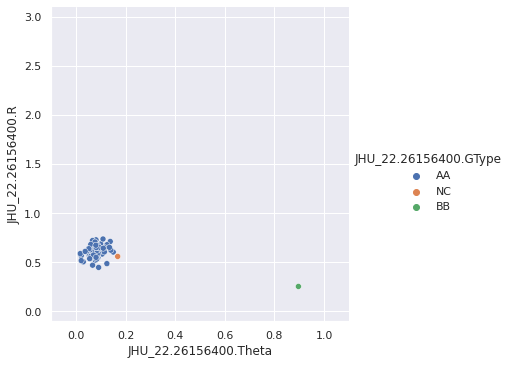

In [14]:
SNP_of_interest = 'JHU_22.26156400'
geno_col = SNP_of_interest + ".GType"
theta_col = SNP_of_interest + ".Theta"
r_col = SNP_of_interest + ".R"
# image_out = out_file + SNP_of_interest + ".png"
sns_plot = sns.relplot(data=to_plot_df, x=theta_col, y=r_col, hue=geno_col)
sns_plot.set(xlim=(-0.1, 1.1))
sns_plot.set(ylim=(-0.1, 3.1))
# plt.savefig(image_out)
# plt.show()
# st.pyplot(sns_plot)


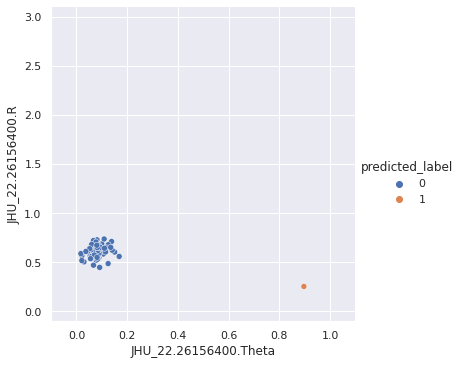

In [15]:
from sklearn.mixture import GaussianMixture

X = to_plot_df[[theta_col,r_col]].copy()
gmm = GaussianMixture(n_components=2, covariance_type= "full", random_state = 123).fit(X)
labels = gmm.predict(X)
X.loc[:,'predicted_label']=labels

sns_plot = sns.relplot(data=X, x=theta_col, y=r_col, hue="predicted_label")
sns_plot.set(xlim=(-0.1, 1.1))
sns_plot.set(ylim=(-0.1, 3.1))

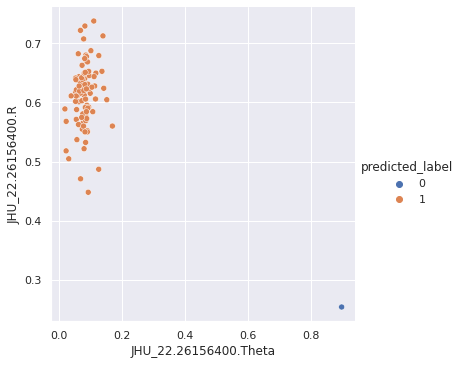

In [17]:
from sklearn.mixture import GaussianMixture
gtypes_for_gmm = list(to_plot_df[geno_col].unique())
gtypes_for_gmm.remove('NC')
n_components = len(gtypes_for_gmm)

X = to_plot_df[[theta_col,r_col]].copy()
gmm = GaussianMixture(n_components=n_components, covariance_type= "diag", random_state = 10).fit(X)
labels = gmm.predict(X)
X.loc[:,'predicted_label'] = labels
# plt.figure(figsize=(9,7))
sns.relplot(data=X, 
                x=theta_col,
                y=r_col, 
                hue="predicted_label")

# code to be removed


In [21]:
position = gmm.means_
covariance = gmm.covariances_


# Convert covariance to principal axes
if covariance.shape == (2, 2):
    U, s, Vt = np.linalg.svd(covariance)
    angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
    width, height = 2 * np.sqrt(s)
else:
    angle = 0
    width, height = 2 * np.sqrt(covariance)

# Draw the Ellipse
for nsig in range(1, 4):
    ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                            angle, **kwargs))
        

idx,JHU_22.26156400.Theta,JHU_22.26156400.R,predicted_label
FS04821313_FO0000275_FUS_R495*_A01_17_A01,0.062027,0.600773,1
FS04821314_FO0000152_MAPT_R317W_A08_17_B01,0.081050,0.728735,1
FS04821315_FO0000163_MAPT_R317W_G09_17_B12,0.086248,0.668563,1
FS04821316_FO0000176_ANG_K41I_A04_17_D01,0.100073,0.687123,1
FS04821317_FO0000188_SNCB_P123H_B08_17_E01,0.073081,0.624279,1
...,...,...,...
FS04821404_FO0000171_APP_A673T_D09_17_C08,0.110191,0.643409,1
FS04821405_FO0000172_APP_A673T_D12_17_C09,0.082090,0.650478,1
FS04821406_FO0000173_APP_A673T_F06_17_C10,0.080408,0.673840,1
FS04821407_FO0000174_APP_A673T_H08_17_C11,0.135242,0.652273,1


In [36]:
# import math
# position = gmm.means_
# covariances = gmm.covariances_
# w = gmm.weights_

# position[0][0]

# def ellipse(x_center=0, y_center=0, ax1 = [1, 0],  ax2 = [0,1], a=1, b =1,  N=100):
#    # x_center, y_center the coordinates of ellipse center
#    # ax1 ax2 two orthonormal vectors representing the ellipse axis directions
#    # a, b the ellipse parameters
#    if np.linalg.norm(ax1) != 1 or np.linalg.norm(ax2) != 1:
#        raise ValueError('ax1, ax2 must be unit vectors')
#    if  abs(np.dot(ax1, ax2)) > 1e-06:
#        raise ValueError('ax1, ax2 must be orthogonal vectors')
#    #rotation matrix   
#    R = np.array([ax1, ax2]).T
#    if np.linalg.det(R) <0: 
#        raise ValueError("the det(R) must be positive to get a  positively oriented ellipse reference frame")
#    t = np.linspace(0, 2*math.pi, N)
#    #ellipse parameterization with respect to a system of axes of directions a1, a2
#    xs = a * math.cos(t)
#    ys = b * math.sin(t)
   
#    # coordinate of the  ellipse points with respect to the system of axes [1, 0], [0,1] with origin (0,0)
#    xp, yp = np.dot(R, [xs, ys])
#    x = xp + x_center 
#    y = yp + y_center
#    return x, y


# ellipse(x_center=position[0], y_center=position[1])

0.896737899999998

In [31]:
position

array([[0.8967379 , 0.2544492 ],
       [0.08019485, 0.61089566]])

In [15]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        

def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

 

TypeError: '(slice(None, None, None), 0)' is an invalid key

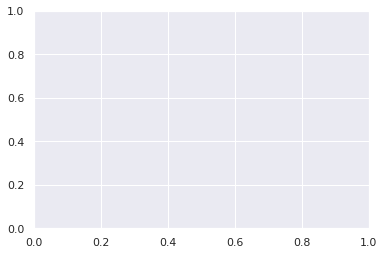

In [16]:

plot_gmm(gmm, to_plot_df[[theta_col,r_col]])   

In [ ]:
# # let's work with chr 22 for testing
# report_in = pd.read_csv('../data/chr22_report.csv', engine='c', dtype={'Chr':str, 'position':int})

# report = report_in.drop(columns=['Index', 'Address', 'Chr', 'Position', 'GenTrain Score', 'Frac A', 'Frac C', 'Frac G', 'Frac T'])

# flag_maf=0.01
# flag_gencall=0.5

# # Chop out to GType, Score and Theta dataframes.
# Name_df = report[['Name']].copy()
# GType_df = report.loc[:, report.columns.str.endswith(".GType")]
# Theta_df = report.loc[:, report.columns.str.endswith(".Theta")]
# R_df = report.loc[:, report.columns.str.endswith(".R")]

# Name_df['Name.GType'] = Name_df.loc[:,'Name'] + ".GType"
# Name_df['Name.Theta'] = Name_df.loc[:,'Name'] + ".Theta"
# Name_df['Name.R'] = Name_df.loc[:,'Name'] + ".R"

# # Merge names plus data types.
# Name_GType_df = pd.concat([Name_df, GType_df], axis=1).rename(columns={"Name.GType":"idx"}).drop(columns=['Name', 'Name.Theta', 'Name.R'])
# Name_GType_df.columns = Name_GType_df.columns.str.replace(".GType", "", regex=False)
# Name_GType_df_final = Name_GType_df.set_index('idx')

# Name_Theta_df = pd.concat([Name_df, Theta_df], axis=1).rename(columns={"Name.Theta": "idx"}).set_index('idx').drop(columns=['Name', 'Name.GType', 'Name.R'])
# Name_Theta_df.columns = Name_Theta_df.columns.str.replace(".Theta", "", regex=False)

# Name_R_df = pd.concat([Name_df, R_df], axis=1).rename(columns={"Name.R":"idx"}).set_index('idx').drop(columns=['Name', 'Name.Theta', 'Name.GType'])
# Name_R_df.columns = Name_R_df.columns.str.replace(".R", "", regex=False)

# #  Transpose the data frames and make the names of the variants plus the suffixes the columns.
# GType_transposed_df = Name_GType_df_final.transpose()
# Theta_transposed_df = Name_Theta_df.transpose()
# R_transposed_df = Name_R_df.transpose()

# # Smash everything together and get ready for plotting.
# temp_df = GType_transposed_df.merge(Theta_transposed_df, left_index=True, right_index=True)
# to_plot_df = temp_df.merge(R_transposed_df, left_index=True, right_index=True)

# # get gentrain scores
# gtrain_scores_df = report_in.loc[:,['Name','GenTrain Score']]
# gtrain_scores_df.columns = ['snpid','gentrain_score']
# # calculate maf
# gtype_df = Name_GType_df.copy()
# gtype_df.loc[:,'snpid'] = gtype_df.loc[:,'idx'].str.replace(".GType", "", regex=False)
# gtype_to_maf = gtype_df.drop(columns=['idx'])
# maf_scores_df = calculate_maf(gtype_to_maf)
# flag_df = maf_scores_df.merge(gtrain_scores_df, how='inner', on='snpid')
# flag_df.loc[:,'maf_flag'] = np.where(flag_df.maf<flag_maf, True, False)
# flag_df.loc[:,'gencall_flag'] = np.where(flag_df.gentrain_score<flag_gencall, True, False)

In [11]:
snp_list = gtype_df.idx
snps_of_interest = list()
count=0
for snp in snp_list:
    if set(['NC','AA','BB']).issubset(list(GType_transposed_df[snp].unique())):
        vc = GType_transposed_df[snp].value_counts()
        # print(vc)
        snps_of_interest.append(snp)
        count+=1
       
print(count)

39


In [13]:
# flag_df[(flag_df.maf>0.03) & (flag_df.maf<0.5)
snps_of_interest_df = pd.DataFrame({'snp':snps_of_interest})
snps_of_interest_df.loc[:,'snp'] = snps_of_interest_df.loc[:,'snp'].str.replace('.GType','',regex=False) 
snps_of_interest_df.to_csv('../data/testing_snps_of_interest.csv', index=False)